In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

import os

In [2]:
df_list = []

data_path = '../Data/'

data = pd.read_csv(data_path + "news-data.csv")
df = data.copy()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281201 entries, 0 to 402
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Title                281201 non-null  object
 1   Content              175095 non-null  object
 2   Content_url          281201 non-null  object
 3   News_type            281200 non-null  object
 4   Day_month_year_hour  281201 non-null  object
 5   Img_url              281201 non-null  object
dtypes: object(6)
memory usage: 15.0+ MB


In [4]:
print(f"len df {len(df)}")
df = df.dropna()
df = df.drop_duplicates()
print(f"len dronna and drop_duplicates {len(df)}")

len df 281201
len dronna and drop_duplicates 167375


In [5]:
def split_date_to_year(day_month_year_hour):
    date = day_month_year_hour.split('-')[0]
    year = "20" + date.split('.')[2]
    return year

def split_date_to_month(day_month_year_hour):
    date = day_month_year_hour.split('-')[0]
    year = date.split('.')[1]
    return year

def split_date_to_day(day_month_year_hour):
    date = day_month_year_hour.split('-')[0]
    year = date.split('.')[0]
    return year

df['Yeary'] = df['Day_month_year_hour'].apply(split_date_to_year)
df['Month'] = df['Day_month_year_hour'].apply(split_date_to_month)
df['Day'] = df['Day_month_year_hour'].apply(split_date_to_day)

df = df.drop(columns=['Day_month_year_hour'])

In [6]:
def plot_type(data, explode):
    explodes = ([explode for i in range(len(set(data)))])
    value_counts = data.value_counts()
    labels = value_counts.index
    values = value_counts.values

    plt.pie(values, labels=labels, autopct='%1.f%%', explode=explodes)
    plt.show()

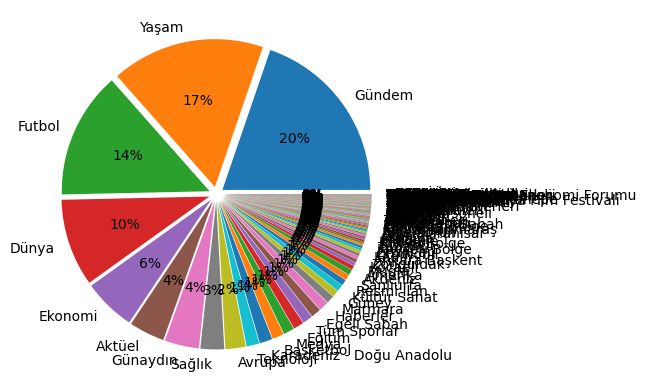

In [7]:
plot_type(df['News_type'], explode=0.05)

In [8]:
def categorize_news_type(news_type, types_list, return_type):
    if news_type in types_list:
        return return_type
    else:
        return news_type

In [9]:
with open("../Preprocess-Data/iller.txt", 'r', encoding='utf-8') as f:
    cities = f.readlines()

cities = [city.strip() for city in cities] + [
    'Kayseri Bölge', 'Karadeniz - Doğu Anadolu', 'Egeli Sabah', 'Marmara', 'Ankara Başkent', 'Akdeniz',
    'Güney'
    ]
    
df['News_type'] = df['News_type'].apply(categorize_news_type, types_list=cities, return_type='Yerel')

In [23]:
sports_teams = [
    "Beşiktaş", "Futbol", "Fenerbahçe",  "Galatasaray", "Trabzonspor", 'Türkiye Kupası', 'Euro 2020',
    'TFF 1. Lig', 'Spor Magazin', 'Transfer Haberleri', 'Uluslararası Futbol Ekonomi Forumu'
]

df['News_type'] = df['News_type'].apply(categorize_news_type, types_list=sports_teams, return_type='futbol')

In [24]:
gloabl_list = ['Amerika', "Avrupa"]

df['News_type'] = df['News_type'].apply(categorize_news_type, types_list=gloabl_list, return_type='Dünya')

In [25]:
recipes_categories = [
    "Kahvaltılık Tarifler", "Çorbalar", "Sebze Yemekleri", "Vegan Tarifler", "Vejetaryen Tarifler",
    "Makarna Ve Pilav Tarifleri", "Yemek Tarifleri", "Kekler", "Salata ve Mezeler", 
    "Kurabiye Tarifleri", "Yemek", "Tatlılar", "Et Yemekleri", "Sağlıklı Tarifler",
    "Hamur İşi", 'Mutfak Sırları', 'İçecek Tarifleri', 'Tatlı Tarifleri', 'Börekler-Çörekler ve Poğaçalar',
    'Soslar ve İçecekler', 'Diğer Tarifler', 'Çorba Tarifleri', 'Pilav Tarifleri', 'Hamurişi Tarifleri',
    'Salata & Meze & Kanepe', 'Makarna Tarifleri', 'Bakliyat Yemekleri', 'Dolma-Sarma Tarifleri',
    'Sandviç Tarifleri', 'Aperatifler', 'Yumurta Yemekleri', 'Dünya Kupası', 'Diyet Yemekleri'
]

df['News_type'] = df['News_type'].apply(categorize_news_type, types_list=recipes_categories, return_type='Yemek Tarifleri')

In [26]:
health_topics = ["Sağlık", "Çocuk Sağlığı", "Ruh Sağlığı", "Kadın Sağlığı", "Erkek Sağlığı"]

df['News_type'] = df['News_type'].apply(categorize_news_type, types_list=health_topics, return_type='Sağlık')

In [27]:
personal_care_categories = [
    "Makyaj", "Saç Bakımı", "Cilt Bakımı", "Güzellik"
]

df['News_type'] = df['News_type'].apply(categorize_news_type, types_list=personal_care_categories, return_type="Kişisel Bakım")

In [28]:
finans_categories = [
    "Finans Kripto Para Haberleri", "Ekonomi", "Finans Şirket Haberleri", "Finans Altın Haberleri", 
    "Finans Emtia-Döviz Haberleri", "Finans Borsa Haberleri", "Finans Gündem Haberleri", "Finans Ekonomi Haberleri",
]

df['News_type'] = df['News_type'].apply(categorize_news_type, types_list=finans_categories, return_type="Finans")

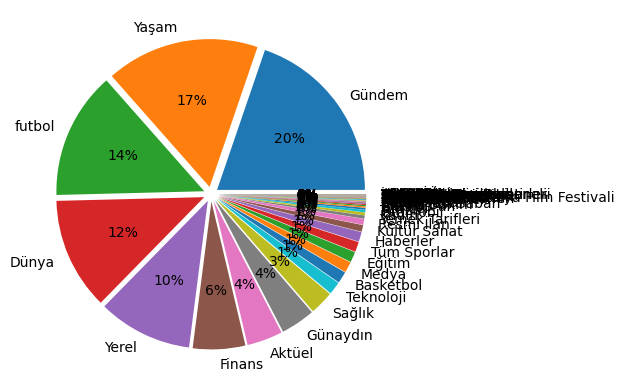

In [29]:
plot_type(df['News_type'], explode=0.05)

In [30]:
def show_news_types(index):
    return df['News_type'].value_counts()[index:index+20]

In [31]:
show_news_types(0)

Gündem             33052
Yaşam              28055
futbol             23252
Dünya              20511
Yerel              17264
Finans              9582
Aktüel              6521
Günaydın            6279
Sağlık              4365
Teknoloji           2335
Basketbol           2131
Medya               1959
Eğitim              1910
Tüm Sporlar         1837
Haberler            1786
Kültür Sanat        1212
Resmi İlan          1072
Yemek Tarifleri      604
Kadın                508
Otomobil             458
Name: News_type, dtype: int64

In [32]:
show_news_types(20)

Turizm                                 344
Güncel                                 246
Bize Sorun                             226
Çocuk                                  184
Kişisel Bakım                          142
Cumartesi Sabah                        138
Pazar Sabah                            135
Spor                                   119
Bebek                                  118
Hamilelik                              107
Kamu Personeli                          89
İLANLAR                                 83
Ramazan                                 73
Ramazan Haberleri                       54
Moda                                    49
Bebeğim ve Biz                          36
Magazin                                 35
Aile ve İlişkiler                       31
Emniyet Personeli                       30
Uluslararası Antalya Film Festivali     26
Name: News_type, dtype: int64

In [33]:
show_news_types(40)

Beslenme               24
Diyet                  23
15 Temmuz İhaneti      23
Askeri Personel        23
İşte İnsan             21
EMEKLİ                 21
Bölgeler               20
Oyun                   19
Kitap                  19
Memurlar               17
Sağlık Personeli       16
Öğretmen               14
Keşfet                 14
Rüya Tabirleri         12
Sözleşmeli Personel    12
Çocuklar İçin          12
Elektrik Kesintisi     11
Teknokulis             11
İlişkiler              10
Temizlik               10
Name: News_type, dtype: int64

In [35]:
show_news_types(60)

KPSS                        8
Güncel Memur Haberleri      8
Dini Hizmetler Personeli    8
Seçim                       7
Emlak                       7
Egzersizler                 7
Stil ve Öneri               6
Teknik Personel             4
Bebekler İçin               3
Yeşil Ekran                 3
Sinema                      2
31. Yıl                     2
Günün Duası                 2
Aile                        2
Astroloji                   2
Sürekli İşçi                2
Engelli Memur               1
Hakim ve Savcı              1
Vodafone Business           1
Akademik Personel           1
Name: News_type, dtype: int64

In [36]:
show_news_types(80)

Gezegen Hareketleri    1
Doğum                  1
Haber                  1
Güzel Sözler           1
Canlı Anlatım          1
Estetik                1
Doğalgaz Kesintisi     1
Basın İlan Kurumu      1
Name: News_type, dtype: int64